In [1]:
words = open('names.txt').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
 len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [7]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [38]:
import torch

In [39]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [40]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [41]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

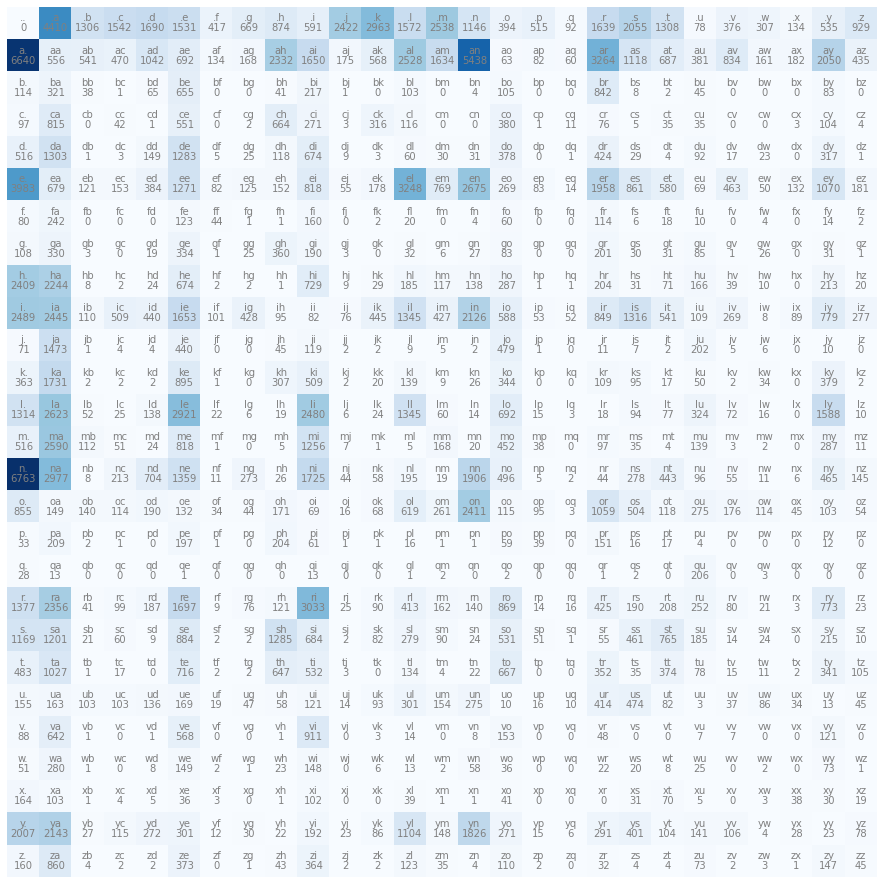

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [69]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [70]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [71]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [92]:
# model smoothing
P = (N+1).float()
P /= P.sum(1, keepdims=True)
# 27 27
# 27  1 
# keepdims = True makes the internal copying (broadcasting) 
# indeed normalize rows
# in case of keepdims=False, 
# it would be normalising columns.

In [93]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):    
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [97]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        # print(f'{ch1}{ch2}: {logprob:.4f}')
        n += 1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [95]:
# GOAL: maximize likelihood p1 * p2 * ...
# equivalent to minimize average negative log likelihood
#    - 1/n * (log(p1) + log(p2) + ...)

In [100]:
# create the training set of bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [101]:
xs

tensor([ 0,  5, 13, 13,  1])

In [102]:
ys

tensor([ 5, 13, 13,  1,  0])

In [103]:
import torch.nn.functional as F

In [109]:
xenc = F.one_hot(xs, num_classes = 27).float()

In [110]:
yenc = F.one_hot(ys, num_classes = 27).float()

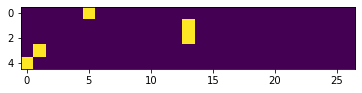

In [111]:
plt.imshow(yenc)

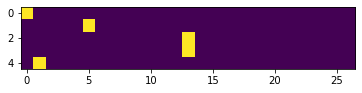

In [112]:
plt.imshow(xenc)

In [114]:
# floats can feed into neural nets
xenc.dtype

torch.float32

In [139]:
W = torch.randn((27, 27), requires_grad=True)
xenc @ W
# (5, 27) @ (27, 27) -> (5, 27)

tensor([[ 1.6982e+00, -3.7882e-01,  1.6275e+00, -1.2281e+00,  5.8813e-01,
          2.4402e+00,  4.4232e-01, -1.2388e+00,  1.1393e+00,  2.1933e-01,
          7.9461e-01, -2.1069e-01, -1.1120e+00, -1.3557e+00,  3.4674e-01,
          9.6256e-01,  1.4175e+00,  1.9006e-01,  3.4344e-01,  1.8525e+00,
          7.4532e-01,  7.1656e-02, -4.6855e-01, -9.4662e-01, -8.7703e-01,
         -7.1309e-01, -4.6276e-01],
        [-3.5685e-01, -9.0151e-01, -5.9469e-01,  1.7925e+00,  3.1188e-01,
         -1.3375e+00,  3.2519e-01, -1.2500e+00, -1.5039e+00, -7.4951e-01,
          4.3982e-01,  8.3008e-01,  1.4988e-02,  1.0157e+00,  4.8936e-01,
          7.8453e-01, -7.5119e-01, -8.8487e-01,  3.4234e-01,  7.2684e-01,
         -8.9169e-01, -4.2538e-01, -3.2167e-01,  3.8400e-01, -9.3155e-04,
          9.0110e-01,  1.1509e+00],
        [-1.0968e-01,  7.1399e-02, -4.3633e-01,  6.6831e-02, -4.3121e-02,
         -2.2915e+00, -3.4754e-01,  1.1394e+00, -3.1417e-01,  1.7934e+00,
         -3.5782e-01, -9.7145e-01, -4.08

In [140]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
# this is called a softmax
probs

tensor([[0.0950, 0.0119, 0.0885, 0.0051, 0.0313, 0.1995, 0.0271, 0.0050, 0.0543,
         0.0216, 0.0385, 0.0141, 0.0057, 0.0045, 0.0246, 0.0455, 0.0717, 0.0210,
         0.0245, 0.1108, 0.0366, 0.0187, 0.0109, 0.0067, 0.0072, 0.0085, 0.0109],
        [0.0187, 0.0109, 0.0148, 0.1608, 0.0366, 0.0070, 0.0371, 0.0077, 0.0060,
         0.0127, 0.0416, 0.0614, 0.0272, 0.0739, 0.0437, 0.0587, 0.0126, 0.0111,
         0.0377, 0.0554, 0.0110, 0.0175, 0.0194, 0.0393, 0.0268, 0.0659, 0.0847],
        [0.0266, 0.0319, 0.0192, 0.0318, 0.0285, 0.0030, 0.0210, 0.0929, 0.0217,
         0.1786, 0.0208, 0.0113, 0.0198, 0.0374, 0.0054, 0.0800, 0.0099, 0.0546,
         0.0311, 0.0138, 0.0398, 0.0620, 0.0299, 0.0169, 0.0248, 0.0756, 0.0118],
        [0.0266, 0.0319, 0.0192, 0.0318, 0.0285, 0.0030, 0.0210, 0.0929, 0.0217,
         0.1786, 0.0208, 0.0113, 0.0198, 0.0374, 0.0054, 0.0800, 0.0099, 0.0546,
         0.0311, 0.0138, 0.0398, 0.0620, 0.0299, 0.0169, 0.0248, 0.0756, 0.0118],
        [0.0114, 0.0143,

In [141]:
probs[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [142]:
probs.shape

torch.Size([5, 27])

In [143]:
xs

tensor([ 0,  5, 13, 13,  1])

In [144]:
ys

tensor([ 5, 13, 13,  1,  0])

In [145]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.1995, grad_fn=<SelectBackward0>),
 tensor(0.0739, grad_fn=<SelectBackward0>),
 tensor(0.0374, grad_fn=<SelectBackward0>),
 tensor(0.0319, grad_fn=<SelectBackward0>),
 tensor(0.0114, grad_fn=<SelectBackward0>))

In [146]:
loss = -probs[torch.arange(5), ys].log().mean()

In [147]:
loss

tensor(3.0836, grad_fn=<NegBackward0>)

In [148]:
# backward pass
W.grad = None # set gradient to zero
loss.backward()

In [149]:
W

tensor([[ 1.6982e+00, -3.7882e-01,  1.6275e+00, -1.2281e+00,  5.8813e-01,
          2.4402e+00,  4.4232e-01, -1.2388e+00,  1.1393e+00,  2.1933e-01,
          7.9461e-01, -2.1069e-01, -1.1120e+00, -1.3557e+00,  3.4674e-01,
          9.6256e-01,  1.4175e+00,  1.9006e-01,  3.4344e-01,  1.8525e+00,
          7.4532e-01,  7.1656e-02, -4.6855e-01, -9.4662e-01, -8.7703e-01,
         -7.1309e-01, -4.6276e-01],
        [-6.0860e-01, -3.8369e-01,  8.3609e-01,  7.3646e-02, -9.3646e-01,
          5.4637e-01,  1.9507e+00,  1.0862e+00,  8.8592e-01, -1.1024e+00,
          1.0177e-02, -1.2485e+00,  1.4129e+00,  4.7973e-01,  1.1168e+00,
         -7.0024e-01, -9.1978e-02, -3.0295e-01,  5.4568e-01,  8.7098e-01,
          1.7391e+00, -2.7749e-01, -9.7384e-01, -1.1600e+00, -1.3190e-01,
          7.4368e-01,  4.6291e-01],
        [-5.8751e-01, -5.6014e-01, -4.6896e-01, -1.2225e+00,  6.5274e-01,
         -1.6360e-01, -1.5534e-01, -4.6043e-01, -7.1745e-01, -5.8710e-02,
         -2.0197e-01,  6.3293e-01,  8.26

In [150]:
W.grad

tensor([[ 0.0190,  0.0024,  0.0177,  0.0010,  0.0063, -0.1601,  0.0054,  0.0010,
          0.0109,  0.0043,  0.0077,  0.0028,  0.0011,  0.0009,  0.0049,  0.0091,
          0.0143,  0.0042,  0.0049,  0.0222,  0.0073,  0.0037,  0.0022,  0.0013,
          0.0014,  0.0017,  0.0022],
        [-0.1977,  0.0029,  0.0097,  0.0045,  0.0016,  0.0073,  0.0296,  0.0125,
          0.0102,  0.0014,  0.0043,  0.0012,  0.0173,  0.0068,  0.0129,  0.0021,
          0.0038,  0.0031,  0.0073,  0.0101,  0.0240,  0.0032,  0.0016,  0.0013,
          0.0037,  0.0089,  0.0067],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [151]:
W.data += -0.1 * W.grad

In [155]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(num)

W = torch.randn((27, 27), requires_grad=True)

228146


In [163]:
# gradient descent
for k in range(50):
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    W.grad = None
    loss.backward()
    
    W.data += -5 * W.grad

2.755380868911743
2.7518136501312256
2.748323678970337
2.7449090480804443
2.741567611694336
2.7382972240448
2.735095977783203
2.7319624423980713
2.7288944721221924
2.7258903980255127
2.7229480743408203
2.7200660705566406
2.71724271774292
2.7144763469696045
2.7117650508880615
2.7091081142425537
2.706502914428711
2.703949451446533
2.7014451026916504
2.698988437652588
2.6965785026550293
2.694214105606079
2.691894054412842
2.6896164417266846
2.6873810291290283
2.685185670852661
2.6830296516418457
2.680912494659424
2.6788322925567627
2.676788091659546
2.674779176712036
2.672804594039917
2.670863389968872
2.668954610824585
2.6670777797698975
2.665231466293335
2.6634151935577393
2.6616275310516357
2.6598691940307617
2.6581380367279053
2.6564338207244873
2.654756546020508
2.653104543685913
2.651477575302124
2.6498751640319824
2.648296594619751
2.6467413902282715
2.6452090740203857
2.6436991691589355
2.6422102451324463


In [164]:
# neural networks are SCALABLE
# as opposed to tables and counting

(-0.5, 26.5, 26.5, -0.5)

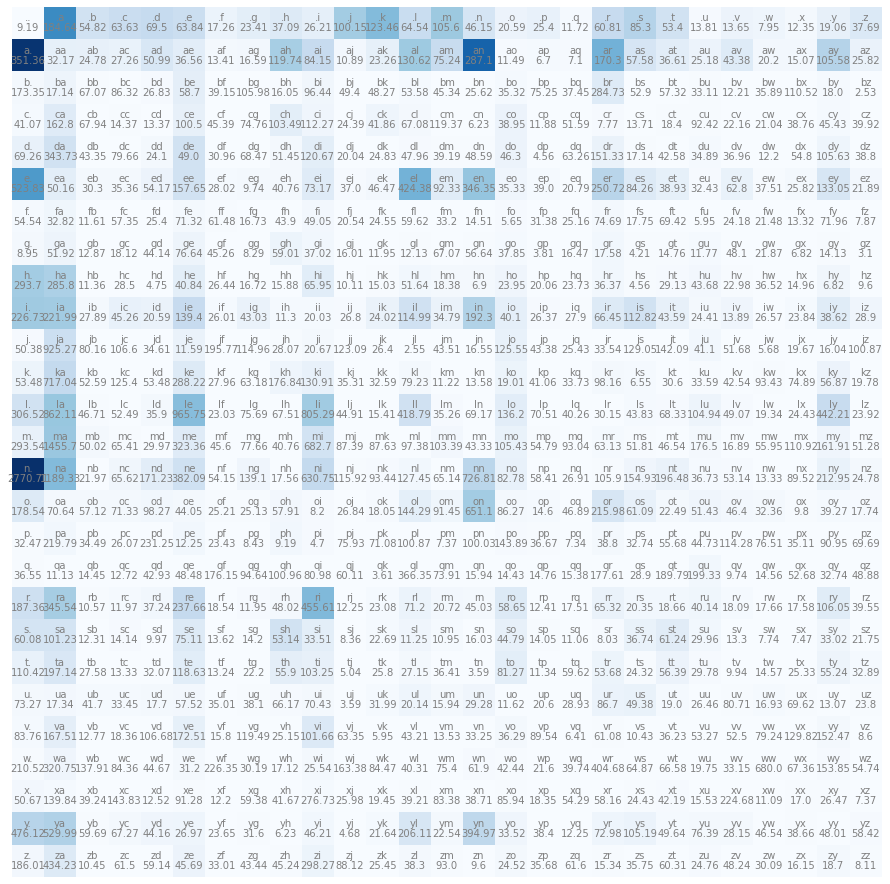

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, round(W[i, j].exp().item() * W[i].exp().sum().item(), 2), ha='center', va='top', color='gray')
plt.axis('off')

In [190]:
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        
        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


.
sdxm.
tavshqtikeysaleeverin.
n.
ewkflbjtqelah.
